#### K-Nearest Neighbors (KNN) Classification
---

K-nearest neighbors classification is (as its name implies) a classification model that uses the "K" most similar observations in order to make a prediction.

KNN is a supervised learning method; therefore, the training data must have known target values.

The process of of prediction using KNN is fairly straightforward:

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

The visualizations below show how a given area can change in its prediction as K changes.

- This is simulated data with two predictors
- Colored points represent true values and colored areas represent a **prediction space**. (This is called a Voronoi Diagram.)
- Each prediction space is wgere the majority of the "K" nearest points are the color of the space.
- To predict the class of a new point, we guess the class corresponding to the color of the space it lies in.

##### KNN Classification Map for Iris (K=1)

![1NN classification map](iris_01nn_map.png)

##### KNN Classification Map for Iris (K=5)

![5NN classification map](iris_05nn_map.png)

##### KNN Classification Map for Iris (K=15)

![15NN classification map](iris_15nn_map.png)

##### KNN Classification Map for Iris (K=50)

![50NN classification map](iris_50nn_map.png)

We can see that, as K increases, the classification spaces' borders become more distinct. However, you can also see that the spaces are not perfectly pure when it comes to the known elements within them.

**How are outliers affected by K?** As K increases, outliers are "smoothed out". Look at the above three plots and notice how outliers strongly affect the prediction space when K=1. When K=50, outliers no longer affect region boundaries. This is a classic bias-variance tradeoff -- with increasing K, the bias increases but the variance decreases.

<div style="color:blue;font-size:125%">
- What happens when K $\rightarrow$ number of points in the sample?
</div>
<div style="color:blue;font-size:125%">
- What is the best value for K?
</div>

##### NBA Position KNN Classifier

This dataset containing the 2015 season statistics for ~500 NBA players. The columns we'll use for features (and the target 'pos') are:

| Column | Meaning |
| ---    | ---     |
| pos | C: Center. F: Front. G: Guard |
| ast | Assists per game | 
| stl | Steals per game | 
| blk | Blocks per game |
| tov | Turnovers per game | 
| pf  | Personal fouls per game | 

**First look at the data file to see whether it fits that description**

In [1]:
import pandas as pd
nba = pd.read_csv('NBA_players_2015.csv', usecols=['pos', 'ast', 'stl', 'blk', 'tov', 'pf'])
print(nba.shape)
print(nba.columns)

(478, 6)
Index(['pos', 'ast', 'stl', 'blk', 'tov', 'pf'], dtype='object')


In [2]:
nba.head(5)

,pos,ast,stl,blk,tov,pf
0,F,1.0,0.4,0.3,0.9,2.2
1,G,0.4,0.4,0.3,0.4,0.8
2,C,1.0,0.4,1.2,1.6,3.0
3,F,0.9,0.2,0.5,0.5,1.8
4,G,1.9,0.6,0.1,1.6,2.1


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
pos    478 non-null object
ast    478 non-null float64
stl    478 non-null float64
blk    478 non-null float64
tov    478 non-null float64
pf     478 non-null float64
dtypes: float64(5), object(1)
memory usage: 22.5+ KB


In [4]:
# Map the position categorical variables into numbers

nba.pos.value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

In [5]:
# Notice that for a classifier we can have a Y that is not 
# numeric and do not need dummy variables.

y = nba.pos
X = nba.drop(columns=['pos'], axis=1)

In [6]:
print(X.shape)
print(y.shape)

(478, 5)
(478,)


In [7]:
X.head(5)

,ast,stl,blk,tov,pf
0,1.0,0.4,0.3,0.9,2.2
1,0.4,0.4,0.3,0.4,0.8
2,1.0,0.4,1.2,1.6,3.0
3,0.9,0.2,0.5,0.5,1.8
4,1.9,0.6,0.1,1.6,2.1


In [9]:
y

0      F
1      G
2      C
3      F
4      G
5      C
6      F
7      C
8      F
9      F
10     G
11     F
12     F
13     C
14     G
15     F
16     F
17     G
18     F
19     C
20     F
21     F
22     F
23     C
24     G
25     F
26     F
27     F
28     G
29     G
      ..
448    G
449    F
450    F
451    G
452    F
453    F
454    F
455    G
456    C
457    F
458    G
459    G
460    G
461    F
462    G
463    G
464    F
465    G
466    F
467    F
468    C
469    G
470    F
471    F
472    G
473    G
474    G
475    F
476    C
477    C
Name: pos, Length: 478, dtype: object

##### Build a model
For KNN, the choice of K is crucial, but we will ignore it for now, just choose k=3.
First job is just to get a classifier running and evaluate it -- just like Linear Regression

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
knn.predict(X)

array(['F', 'F', 'C', 'F', 'G', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'G', 'C', 'F', 'F', 'F', 'C', 'G', 'F',
       'F', 'F', 'G', 'G', 'C', 'F', 'F', 'C', 'G', 'F', 'G', 'G', 'C',
       'F', 'G', 'F', 'G', 'C', 'F', 'G', 'C', 'F', 'F', 'G', 'G', 'F',
       'C', 'F', 'C', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'F', 'G', 'G',
       'G', 'F', 'G', 'G', 'F', 'G', 'F', 'F', 'G', 'G', 'G', 'G', 'C',
       'F', 'G', 'G', 'F', 'G', 'C', 'F', 'G', 'C', 'G', 'G', 'F', 'G',
       'G', 'F', 'G', 'F', 'F', 'G', 'C', 'G', 'G', 'G', 'F', 'F', 'G',
       'G', 'C', 'C', 'F', 'F', 'F', 'F', 'F', 'G', 'F', 'C', 'G', 'F',
       'G', 'G', 'C', 'G', 'F', 'G', 'F', 'G', 'C', 'G', 'C', 'G', 'F',
       'F', 'F', 'F', 'G', 'G', 'F', 'G', 'F', 'F', 'G', 'G', 'C', 'C',
       'G', 'F', 'G', 'G', 'G', 'G', 'G', 'G', 'C', 'F', 'F', 'G', 'G',
       'F', 'C', 'F', 'F', 'F', 'F', 'G', 'C', 'F', 'G', 'F', 'G', 'C',
       'G', 'C', 'F', 'C', 'C', 'F', 'G', 'F', 'F', 'F', 'F', 'G

In [11]:
from sklearn import metrics
metrics.accuracy_score(y, knn.predict(X))

0.8096234309623431

In [12]:
#  Setting n_neighbors to 1.  What do you expect to happen here?

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
metrics.accuracy_score(y, knn.predict(X))

1.0

#### Side Note:  Remember That the Classifier is Calculating a Conditional Probability

Classifier will choose the class with highest probability, but knowing the underlying probability can be useful for debugging

In [13]:
knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X, y)
knn15.predict_proba(X)

array([[0.06666667, 0.73333333, 0.2       ],
       [0.06666667, 0.8       , 0.13333333],
       [0.6       , 0.4       , 0.        ],
       ...,
       [0.06666667, 0.46666667, 0.46666667],
       [0.4       , 0.6       , 0.        ],
       [0.46666667, 0.46666667, 0.06666667]])

### Using the Train/Test Split Procedure

* Remember we have been evaluating training error
* To evaluate testing error, we can split training data into training set and test set

#### Step 1: Split X and y into training and testing sets (using `random_state` for reproducibility).

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state = 333)

In [15]:
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((358, 5), (358,), (120, 5), (120,))

#### Step 2: Train the model on the training set

In [16]:
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

**And evaluate it on the test set**

In [17]:
metrics.accuracy_score(y_test, knn3.predict(X_test))

0.6583333333333333

In [18]:
#  Now maybe 1 neighbor won't work as well?
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
metrics.accuracy_score(y_test, knn1.predict(X_test))

0.6416666666666667

#### Comparing Testing Accuracy With Null Accuracy (The Low Bar)

Null accuracy is the accuracy that can be achieved by **always predicting the most frequent class**. For example, if most players are Centers, we would always predict Center.

The null accuracy is a benchmark against which you may want to measure every classification model.

In [19]:
most_freq_class = y.value_counts().index[0]
print(y.value_counts())
print(most_freq_class)

G    200
F    199
C     79
Name: pos, dtype: int64
G


#### Compute null accuracy.

In [20]:
y.value_counts()[most_freq_class] / len(y)

0.41841004184100417

#### Cross-Validation

In [21]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores

array([0.66666667, 0.66666667, 0.77083333, 0.5       , 0.66666667,
       0.77083333, 0.6875    , 0.5625    , 0.60416667, 0.67391304])

In [22]:
(scores.mean(), scores.std())

(0.6569746376811595, 0.07986444428356426)

In [ ]:
# From this we can get a 95% confidence interval on test accuracy
(scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=10)
(scores.mean() - 2*scores.std(), scores.mean() + 2 * scores.std())

There is a tradeoff in choosing number of cross-validation folds
  * Fewer folds, faster, less aggressive use of test data (cv=1 is just a train/test split)
  * More folds, slower.  cv=n-1 is "all but one validation"

In [23]:
knn = KNeighborsClassifier(n_neighbors=10)
for v in (2, 10, 20, 50, 100, 200):
    cv = cross_val_score(knn, X, y, cv=v)
    print (v, cv.mean(), cv.std())    


2 0.6422619047619048 0.0005952380952380931
10 0.6819746376811594 0.08114895644566306
20 0.6729166666666667 0.08465104022462519
50 0.6864999999999999 0.12722829922409867


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 79 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


100 0.6853333333333333 0.21640086259840405


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 79 members, which is too few. The minimum number of members in any class cannot be less than n_splits=200.
  % (min_groups, self.n_splits)), Warning)


200 0.6858333333333334 0.30192783354084246


##### Hyperparameter Optimization

Hyperparameter optimization, or tuning,  means find an optimal value for K

<span style="color:blue">What does optimal mean?</span>

In [24]:
scores = []
for k in range(1, 200, 4):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, X, y, cv=10)
    scores.append([k, cv.mean()])

In [25]:
scores[0]

[1, 0.6047101449275363]

In [26]:
scores

[[1, 0.6047101449275363],
 [5, 0.6569746376811595],
 [9, 0.6653079710144928],
 [13, 0.667391304347826],
 [17, 0.6528985507246376],
 [21, 0.6568840579710146],
 [25, 0.6717391304347826],
 [29, 0.6528985507246376],
 [33, 0.6634057971014492],
 [37, 0.6612318840579711],
 [41, 0.6591485507246377],
 [45, 0.6612318840579711],
 [49, 0.6549818840579711],
 [53, 0.6570652173913043],
 [57, 0.6488224637681159],
 [61, 0.6466485507246377],
 [65, 0.6570652173913043],
 [69, 0.6507246376811594],
 [73, 0.6569746376811594],
 [77, 0.6465579710144927],
 [81, 0.6487318840579711],
 [85, 0.6445652173913043],
 [89, 0.6341485507246377],
 [93, 0.6340579710144928],
 [97, 0.6131340579710145],
 [101, 0.6089673913043478],
 [105, 0.6110507246376812],
 [109, 0.6048007246376812],
 [113, 0.6089673913043478],
 [117, 0.6089673913043478],
 [121, 0.6131340579710145],
 [125, 0.6110507246376812],
 [129, 0.6110507246376812],
 [133, 0.6110507246376812],
 [137, 0.6110507246376812],
 [141, 0.6089673913043477],
 [145, 0.611050724637

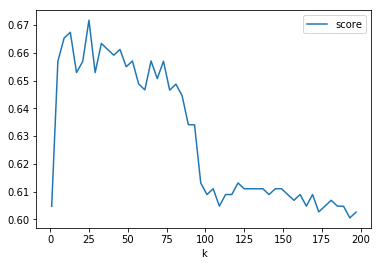

In [28]:
# This is a plot of test accuracy as a function of k

data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

#####  Since it looks like > 100 is less interesting, let's give it more focus

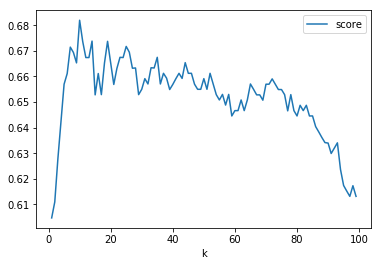

In [29]:
scores = []
for k in range(1, 100, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, X, y, cv=10)
    scores.append([k, cv.mean()])
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

**Question:** As K increases, why does the accuracy rise then fall?

**Answer:** ...

#### Search for the "best" value of K.

In [31]:
# Calculate TRAINING ACCURACY and TESTING ACCURACY for K=1 through 358.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state = 333)

k_range = list(range(1, 100, 2))

training_accuracies = []
testing_accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training accuracy
    y_pred_training = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_training)
    training_accuracies.append(training_accuracy)
    
    # Calculate testing error.
    y_pred_test = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(testing_accuracy)

In [32]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'k': k_range, 'training_accuracy':training_accuracies, 'testing_accuracy':testing_accuracies}
df = pd.DataFrame(column_dict).sort_values(by='k')

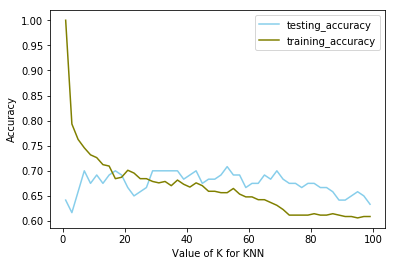

In [33]:
# Plot the relationship between k and training and test accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'k', 'testing_accuracy', data=df, color='skyblue')
plt.plot( 'k', 'training_accuracy', data=df, color='olive')
plt.legend()
plt.xlabel('Value of K for KNN');
plt.ylabel('Accuracy');

<a id="training-error-versus-testing-error"></a>
### Training Accuracy Versus Testing Accuracy

- Remember that model complexity is greatest at $K=1$ -- as $K$ gets larger the model tends toward "predict at the mode"

- **Training accuracy** increases as model complexity increases (lower value of K).
- **Testing accuracy** will tend to be low (overfitting, too much complexity) then increase, then decrease (too little complexity)

Evaluating the training and testing accuracy is important. For example:

- If the training accuracy is much higher than the test accuracy, then our model is likely overfitting. 
- If the test accuracy starts decreasing as we vary a hyperparameter (K), we may be overfitting.
- If either accuracy plateaus, our model is likely underfitting (not complex enough).

##### Grid Search:  

We have this pattern now
* Choose a hyperparameter
* Fit a model using cross validation
* Record accuracy for that model
* Choose the hyperparameter that maximizes cross-val accuracy

In [34]:
from sklearn import grid_search
parameters = {'n_neighbors': list(range(1,100))}
knn = KNeighborsClassifier()
clf = grid_search.GridSearchCV(knn, parameters)
clf.fit(X, y)
clf.get_params()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'cv': None,
 'error_score': 'raise',
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': 1,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'),
 'fit_params': {},
 'iid': True,
 'n_jobs': 1,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   6

In [35]:
metrics.accuracy_score(y, clf.predict(X))

0.7071129707112971

In [36]:
testing_accuracies[4]

0.675

### Summary

* Classification
* Train vs test error
* Hyperparameter optimization
  * Balancing *bias* versus *variance*
* This procedure is exactly the same in scikit-learn regardless of the algorithm!

**Advantages of KNN:**

- It's simple to understand and explain.
- Model training is fast.
- It can be used for classification and regression (for regression, take the average value of the K nearest points!).
- Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

**Disadvantages of KNN:**

- It must store all of the training data.
- Its prediction phase can be slow when n is large.
- It is sensitive to irrelevant features.
- It is sensitive to the scale of the data.
- Accuracy is (generally) not competitive with the best supervised learning methods.